### Informations about the dataset:
`DR_NO` - Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits (change to `id_crime`)

`AREA` - The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

`AREA NAME` - The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.

`Rpt Dist No` - A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons

`Vict Age` - Age of the crime victim (Two character numeric)

`Vict Sex` - sex of the crime victim (F - Female, M - Male, X - Unknown)

`Vict Descent` - descendant of the crime victim (Descent Code: A - Other Asian, B - Black, C - Chinese, D - Cambodian, F - Filipino, G - Guamanian, H - Hispanic/Latin/Mexican, I - American Indian/Alaskan Native, J - Japanese, K - Korean, L - Laotian, O - Other, P - Pacific Islander, S - Samoan, U - Hawaiian, V - Vietnamese, W - White, X - Unknown, Z - Asian Indian)

`Premis Cd` - The type of structure, vehicle, or location where the crime took place.

`Weapon Used Cd` - The type of weapon used in the crime

`Weapon Desc` - Defines the Weapon Used Code provided.

`Status` - Status of the case. (IC is the default)

`LOCATION` - Street address of crime incident rounded to the nearest hundred block to maintain anonymity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

## Loading the dataset

In [2]:
crimes = pd.read_csv('crime_data_from_2020.csv')
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


## Understanding the dataset and correcting and fixing some details.

In [3]:
print(f'The dataset has {len(crimes)} rows')

#printing the column types to check if the dataset needs any conversion:
print(crimes.dtypes)

#Rename some columns to make the code easier later:
crimes = crimes.rename(columns={'DR_NO': 'id_crime', 'Date Rptd': 'date_reported', 'DATE OCC': 'date_occurred', 'AREA': 'area', 
                                'AREA NAME': 'area_name', 'Vict Age': 'victim_age', 'Vict Sex': 'victim_sex', 'Vict Descent': 'victim_descent', 
                                'Premis Desc': 'crime_local', 'Weapon Used Cd': 'weapon_type', 'Weapon Desc': 'weapon_used', 'Status': 'case_status', 
                                'TIME OCC': 'hour_occurred', 'Crm Cd Desc': 'crime_committed'})

#verifying if exist null values in the dataset:
display(crimes.isna().sum())

crimes['date_occurred'] = pd.to_datetime(crimes['date_occurred'])

The dataset has 1004991 rows
DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object


id_crime                 0
date_reported            0
date_occurred            0
hour_occurred            0
area                     0
area_name                0
Rpt Dist No              0
Part 1-2                 0
Crm Cd                   0
crime_committed          0
Mocodes             151619
victim_age               0
victim_sex          144644
victim_descent      144656
Premis Cd               16
crime_local            588
weapon_type         677744
weapon_used         677744
case_status              1
Status Desc              0
Crm Cd 1                11
Crm Cd 2            935831
Crm Cd 3           1002677
Crm Cd 4           1004927
LOCATION                 0
Cross Street        850755
LAT                      0
LON                      0
dtype: int64

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_20676\3120760291.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes['date_occurred'] = pd.to_datetime(crimes['date_occurred'])


This dataset will contain null values because some columns do not necessarily need to be filled, for example, the columns crm cd 1, crm cd 2 and crm cd 3

In [4]:
display(crimes.area_name.unique())

array(['N Hollywood', 'Van Nuys', 'Wilshire', 'Pacific', 'Hollenbeck',
       'Southwest', 'Northeast', 'Devonshire', 'Topanga', 'Hollywood',
       'Olympic', 'Southeast', 'Newton', 'Foothill', 'Mission', 'Rampart',
       'Central', 'West LA', '77th Street', 'West Valley', 'Harbor'],
      dtype=object)

In [5]:
print(crimes.date_occurred.dt.year.unique())

[2020 2021 2022 2023 2024 2025]


The dataset covers the years 2020 to 2025

## Crimes by year:
I separated the number of crimes by year, to see how they were varying by year. And we can already see a potential problem, which is that the 2025 crime figures don't seem to have been updated, perhaps it would be best to leave out the year 2025 and evaluate the rest for more realistic results.

In [6]:
display(crimes.groupby(crimes.date_occurred.dt.year)['id_crime'].count())

date_occurred
2020    199847
2021    209876
2022    235259
2023    232345
2024    127567
2025        97
Name: id_crime, dtype: int64

Los Angeles had its highest number of crimes in 2022, reaching 235,259 recorded incidents.

In [7]:
crimes_2025 = crimes[crimes.date_occurred.dt.year == 2025]
print(crimes_2025.date_occurred.dt.month.max())

5


The dataset has been updated up to month 5, however we will still exclude 2025 from the analysis.

### Going into more detail about the years

In [8]:
years = crimes.date_occurred.dt.year.unique().tolist()
del years[-1]
print(years)

[2020, 2021, 2022, 2023, 2024]


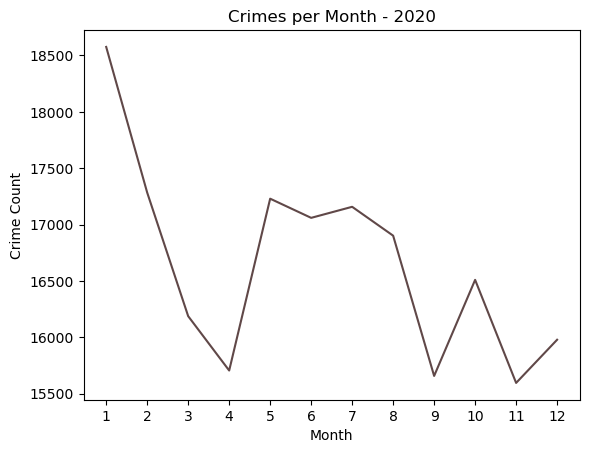

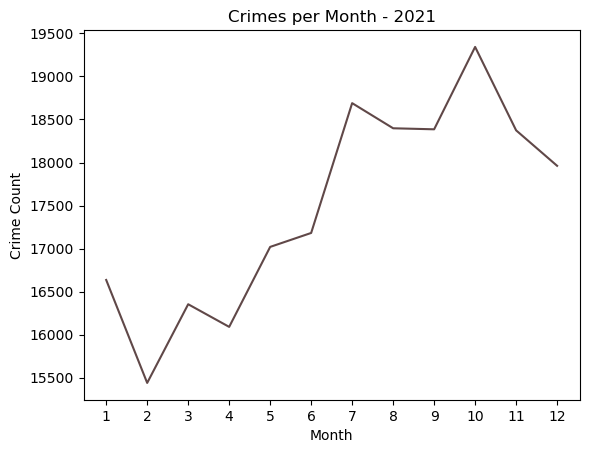

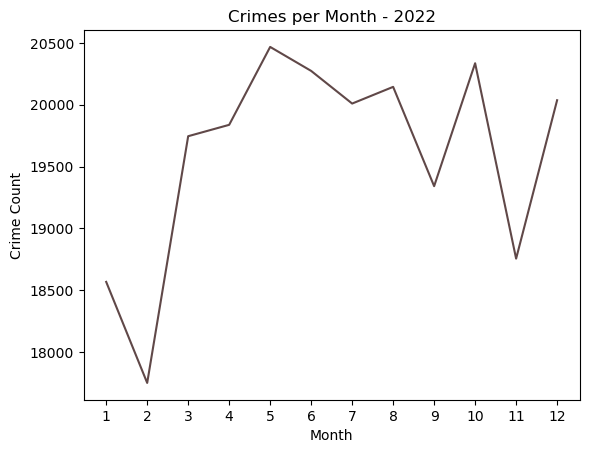

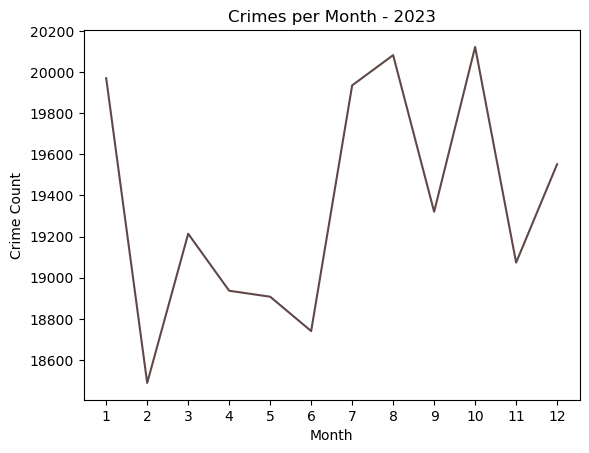

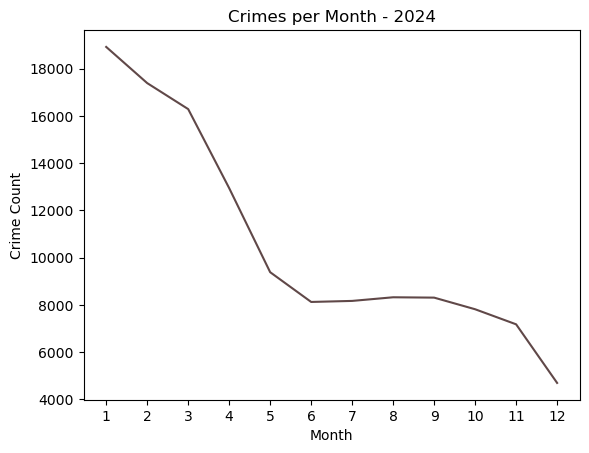

<Figure size 640x480 with 0 Axes>

In [9]:
for year in years:
    df_year = crimes[crimes.date_occurred.dt.year == year]
    # Count crimes per month
    monthly_counts = df_year.groupby(df_year.date_occurred.dt.month)["id_crime"].count()
    
    plt.plot(monthly_counts.index, monthly_counts.values, label=str(year), color = '#604848')
    plt.xlabel("Month")
    plt.ylabel("Crime Count")
    plt.title(f"Crimes per Month - {year}")
    plt.xticks(range(1, 13))
    plt.show()
    plt.clf()

The graph shows that `2022` was the year with the highest and most consistent numbers, while `2024` showed a considerable drop from the first months to the end of the year, registering the lowest crime rates among the years analyzed.

## Most used weapons in crimes

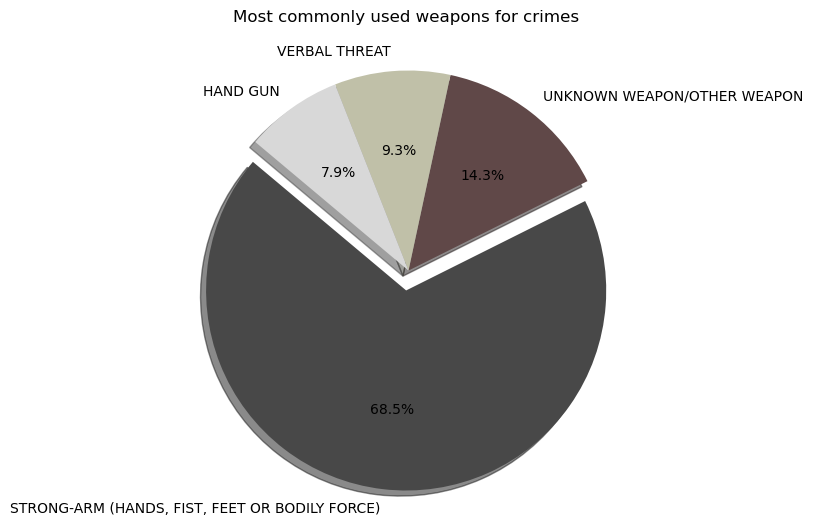

<Figure size 640x480 with 0 Axes>

In [10]:
#Grouping the data:
weapons_rank = crimes.groupby(crimes.weapon_used)['id_crime'].count().sort_values(ascending = False)

#styling the chart:
weapons_list = ['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'UNKNOWN WEAPON/OTHER WEAPON', 'VERBAL THREAT', 'HAND GUN']
colors_pie = ['#484848', '#604848', '#c0c0a8', '#d8d8d8']
explode = (0.1, 0, 0, 0)

#chart configuration:
plt.figure(figsize=(8,6))
plt.pie(weapons_rank[weapons_rank > 10000], labels = weapons_list, explode=explode, colors = colors_pie, autopct = '%.1f%%', shadow = True, startangle=140)
plt.axis('equal')
plt.title('Most commonly used weapons for crimes', pad = 20)
plt.show()
plt.clf()

In [11]:
print(f'The dataset has {len(weapons_rank)} different weapons')

The dataset has 79 different weapons


There are many types of `weapons` used in crimes, so to avoid a very long and cluttered list, I've included a top 10 list of the most commonly used weapons in crimes and we can already see a big difference in the numbers between the first and second items on the list.

In [12]:
weapons_rank = crimes.groupby(crimes.weapon_used)['id_crime'].count().sort_values(ascending = False).reset_index()
weapons_rank = weapons_rank.rename(columns={'weapon_used': 'Weapon', 'id_crime': 'Times used'})
display(weapons_rank.head(10))

,Weapon,Times used
0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",174761
1,UNKNOWN WEAPON/OTHER WEAPON,36390
2,VERBAL THREAT,23846
3,HAND GUN,20182
4,SEMI-AUTOMATIC PISTOL,7267
5,KNIFE WITH BLADE 6INCHES OR LESS,6838
6,UNKNOWN FIREARM,6582
7,OTHER KNIFE,5879
8,MACE/PEPPER SPRAY,3730
9,VEHICLE,3260


## Places with higher crime rates

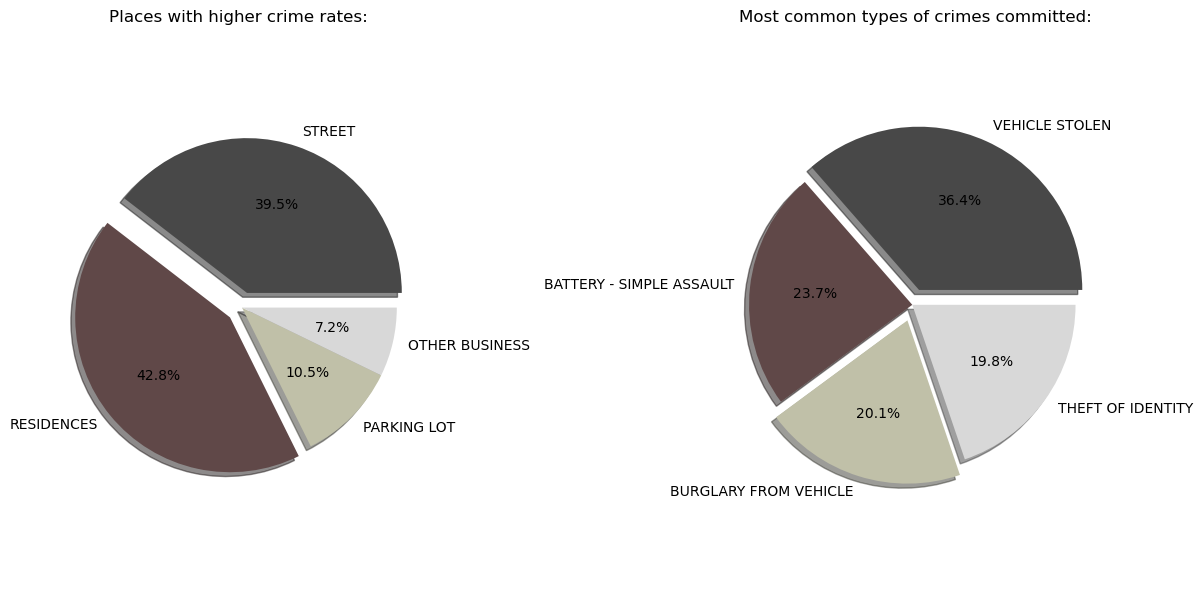

<Figure size 640x480 with 0 Axes>

In [13]:
#styling the first chart 'Places with higher crime rates':
local_list = ['STREET', 'RESIDENCES', 'PARKING LOT', 'OTHER BUSINESS']
local_values = [261284, 163654 + 119011, 69147, 47647]
colors_pie = ['#484848', '#604848', '#c0c0a8', '#d8d8d8']
explode = (0.1, 0.1, 0, 0)

#styling the second chart 'Most common types of crimes committed':
crime_committed = crimes.groupby(crimes.crime_committed)['id_crime'].count().sort_values(ascending=False)
labels_snd_chat = ['VEHICLE STOLEN', 'BATTERY - SIMPLE ASSAULT', 'BURGLARY FROM VEHICLE', 'THEFT OF IDENTITY']
explode_snd = (0.1, 0, 0.1, 0)

#First chart configuration:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
plt.pie(local_values, labels = local_list, colors = colors_pie, explode = explode, autopct = '%.1f%%', shadow = True)
plt.axis('equal')
plt.title('Places with higher crime rates:')

#Second chart configuration:
ax2 = plt.subplot(1, 2, 2)
plt.pie(crime_committed[crime_committed > 62000], labels = labels_snd_chat, colors = colors_pie, explode = explode_snd, autopct = '%.1f%%', shadow = True)
plt.axis('equal')
plt.title('Most common types of crimes committed:')

plt.tight_layout()
plt.show()
plt.clf()

`Streets` and `residences` generally account for the largest percentage of criminal occurrences, and comparing this with the table of `crimes committed`, we can see a relationship between the locations and the types of crimes committed.

#### `Places with the highest crime rates table` and `Most common types of crimes committed table`

In [14]:
local_crime = crimes.groupby(crimes.crime_local)['id_crime'].count().sort_values(ascending=False)
local_crime = crimes.groupby(crimes.crime_local)['id_crime'].count().sort_values(ascending=False).reset_index()
local_crime = local_crime.rename(columns={'id_crime':'Number of crimes'})
display(local_crime.head(10))

,crime_local,Number of crimes
0,STREET,261284
1,SINGLE FAMILY DWELLING,163654
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",119011
3,PARKING LOT,69147
4,OTHER BUSINESS,47647
5,SIDEWALK,40861
6,"VEHICLE, PASSENGER/TRUCK",29302
7,GARAGE/CARPORT,19362
8,DRIVEWAY,16082
9,DEPARTMENT STORE,14433


In [15]:
crime_committed = crimes.groupby(crimes.crime_committed)['id_crime'].count().sort_values(ascending=False).reset_index()
crime_committed = crime_committed.rename(columns={'id_crime':'Number of crimes'})
display(crime_committed.head(10))

,crime_committed,Number of crimes
0,VEHICLE - STOLEN,115190
1,BATTERY - SIMPLE ASSAULT,74839
2,BURGLARY FROM VEHICLE,63517
3,THEFT OF IDENTITY,62537
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",61092
5,BURGLARY,57871
6,THEFT PLAIN - PETTY ($950 & UNDER),53717
7,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53525
8,INTIMATE PARTNER - SIMPLE ASSAULT,46712
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),41314


In [16]:
print(crimes.victim_sex.unique())

['M' 'F' nan 'X' 'H' '-']


## Do these crimes have a specific target?

Let's dive a little deeper into the people who suffered these crimes and look for any patterns. First, let's separate the victims by the genders available in the dataset.

In [17]:
crimes_gender = crimes.groupby(crimes.victim_sex)['id_crime'].count().sort_values(ascending=False).reset_index()
display(crimes_gender)

,victim_sex,id_crime
0,M,403879
1,F,358580
2,X,97773
3,H,114
4,-,1


The dataset added some new variables(H, -), but it wasn't clarified what they represent. Therefore, in order to maintain clarity in the data, we will only work with the variables explained by the dataset's creators.

In [18]:
crimes_gender = crimes_gender[~((crimes_gender.victim_sex == 'H') | 
                                 (crimes_gender.victim_sex == '-'))]
crimes_gender = crimes_gender.rename(columns={'victim_sex': 'gender', 'id_crime': 'attempted crimes suffered'})
display(crimes_gender)

,gender,attempted crimes suffered
0,M,403879
1,F,358580
2,X,97773


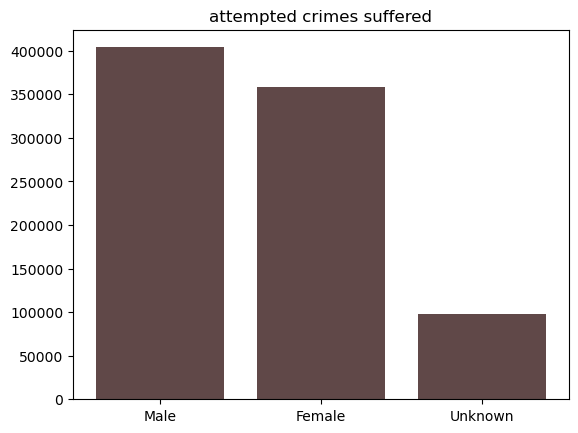

<Figure size 640x480 with 0 Axes>

In [19]:
plt.bar(crimes_gender.gender, crimes_gender['attempted crimes suffered'], color = '#604848')
plt.title('attempted crimes suffered')
plt.xticks(range(len(crimes_gender.gender)), ['Male', 'Female', 'Unknown'])
plt.show()
plt.clf()

Here we can see that there is a difference between crimes committed against `men` and `women`, but we cannot establish a pattern. Let's delve into the material provided and separate the victims by `ethnicity` and check the numbers.

In [20]:
descent_crimes = crimes.groupby(crimes.victim_descent)['id_crime'].count().sort_values(ascending=False).reset_index()
descent_crimes['percentage'] = (descent_crimes['id_crime'] / descent_crimes['id_crime'].sum()) * 100
descent_crimes = descent_crimes.rename(columns={'id_crime': 'attempted crimes suffered'})
descent_crimes = descent_crimes.drop(19)
display(descent_crimes)

,victim_descent,attempted crimes suffered,percentage
0,H,296404,34.452161
1,W,201442,23.414368
2,B,135816,15.786409
3,X,106685,12.400402
4,O,78005,9.066817
5,A,21340,2.480429
6,K,5990,0.696240
7,F,4838,0.562339
8,C,4631,0.538279
9,J,1586,0.184347


With this table we were able to find more significant numbers. For some reason, those who suffer most from crime are `Hispanics/Latin/Mexicans`, perhaps due to the location where most of the crimes in this dataset are concentrated.

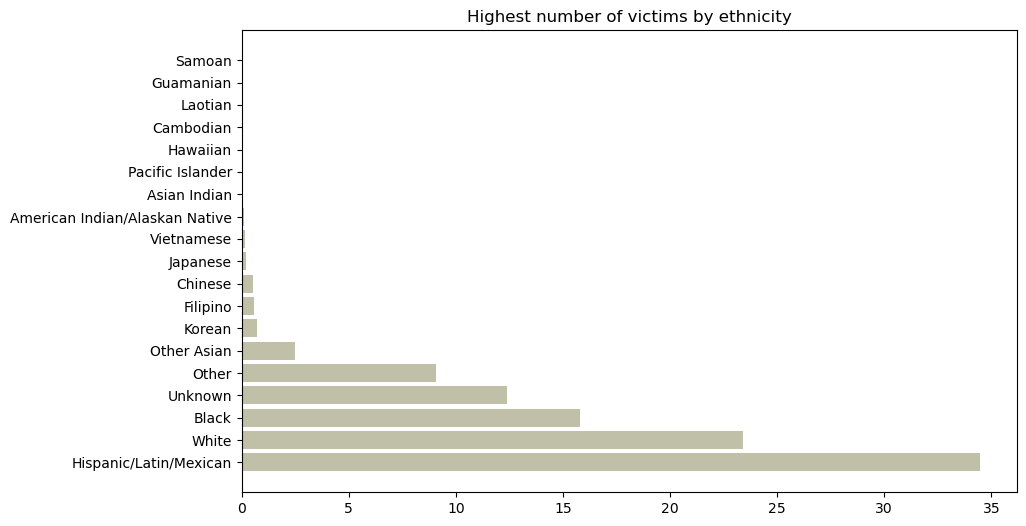

<Figure size 640x480 with 0 Axes>

In [21]:
order = ['Hispanic/Latin/Mexican', 'White','Black','Unknown','Other','Other Asian','Korean','Filipino','Chinese','Japanese','Vietnamese',
           'American Indian/Alaskan Native','Asian Indian','Pacific Islander','Hawaiian','Cambodian','Laotian','Guamanian','Samoan']
plt.figure(figsize=(10,6))
plt.barh(descent_crimes.victim_descent, descent_crimes.percentage, color = '#c0c0a8')
plt.yticks(range(len(descent_crimes.victim_descent)), order)
plt.title('Highest number of victims by ethnicity')
plt.show()
plt.clf()

#### Do `Hispanics` experience more street crime than the general average?

To perform this test, we first need to find out how many people have been victims of crimes on the streets.

In [23]:
general_proportion = 302145 / len(crimes)
print(round(general_proportion,2))

0.3


So we know that the overall rate of victims on the streets is 0,3. Now we want to know the proportion of Hispanic people who have been victims of street crime.

In [ ]:
hispanic_street = crimes[(crimes.victim_descent == 'H') & ((crimes.crime_local == 'STREET') | (crimes.crime_local == 'SIDEWALK'))]['id_crime'].count()
proportion_hispanic = hispanic_street / 296404
print(round(proportion_hispanic,2))

And now we want to know if a Hispanic person being a victim of a crime on the street is higher than the general average.

In [ ]:
k= hispanic_street
n = 296404
p0 = street_proportion
z, p_value = proportions_ztest(hispanic_street, 296404, street_proportion, alternative='larger')
print(p_value)

If the p-value = 1.0, this shows that not only is it not greater, but it is also statistically very far from it. So no, they don't suffered more crime on the streets than the average.

#### And regarding crimes in residences, is there any relationship?

In [ ]:
hispanic_home = crimes[(crimes.victim_descent == 'H') & ((crimes.crime_local == 'SINGLE FAMILY DWELLING') | (crimes.crime_local == 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)'))]['id_crime'].count()
hispanic_home = hispanic_home / 296404
general = 282665 / len(crimes)
z, p_value = proportions_ztest(hispanic_home, 296404, general, alternative='larger')
print(p_value)

The same thing happens when we see if they suffer more crimes than average in their homes.

## Conclusions

Based on the data collected, we observed that most crimes occur on the streets and in residences (considering both categories) and target the victim's car. Since most crimes do not involve weapons, we can interpret that they happen very quickly, to the point that the victim cannot escape, probably when the car is parked at home or stopped on the street for some reason. This was the pattern observed in the analysis. The criminals do not seem to have a specific victim profile, according to the data collected. They likely choose people who are more inattentive or vulnerable and assess the situation at the moment of the crime.